<a href="https://colab.research.google.com/github/AmanuelKBr/Real_Estate_Analysis_-_Forecasting/blob/main/Real_Estate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick

In [ ]:
#Aesthetic
plt.style.use('default')  # Reset to default style
sns.set_theme(style="whitegrid")  # Use seaborn's whitegrid style
sns.set_palette('viridis')

In [ ]:
data = pd.read_csv('kc_house_data.csv')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.shape

(21613, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Data preprocessing
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [ ]:
# Create a price per square foot column
data['price_per_sqft'] = data['price'] / data['sqft_living']

In [ ]:
# Create a categorical variable for house age
current_year = 2015
data['house_age'] = current_year - data['yr_built']
data['age_category'] = pd.cut(data['house_age'],
                             bins=[0, 10, 20, 40, 60, 100, 200],
                             labels=['0-10 years', '11-20 years', '21-40 years',
                                    '41-60 years', '61-100 years', '100+ years'])

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,price_per_sqft,house_age,age_category
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,10,2014,188.050847,60,41-60 years
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,12,2014,209.338521,64,61-100 years
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2,2015,233.766234,82,61-100 years
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,12,2014,308.163265,50,41-60 years
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2,2015,303.571429,28,21-40 years


In [ ]:
#Check for missing values
print(data.isnull().sum())

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
month              0
year               0
price_per_sqft     0
house_age          0
age_category      38
dtype: int64


In [ ]:
data.describe() # Avg price : 540,088

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,price_per_sqft,house_age
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954,264.156594,43.994864
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000,87.588235,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000,182.291667,18.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000,244.644550,40.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000,318.322981,64.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000,810.138889,115.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616,110.060793,29.373411


## Analysis for Buyers

### 1. What are the most affordable areas (zipcodes) in King County?

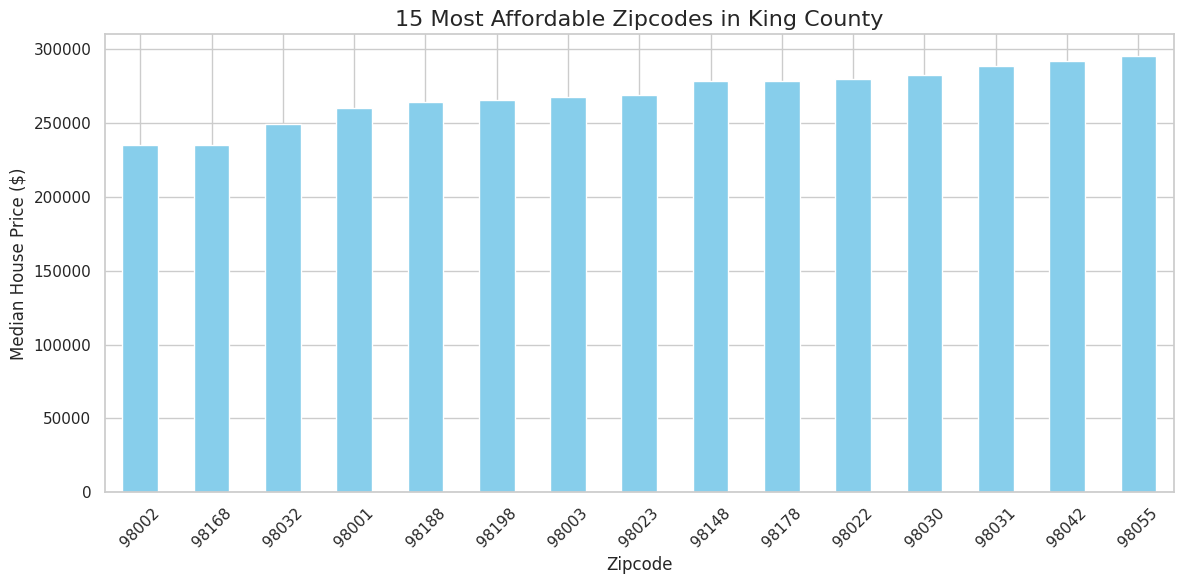

In [ ]:
zipcode_median_price = data.groupby('zipcode')['price'].median().sort_values()

#Get the top 15 most affordable
affordable_zipcodes = zipcode_median_price.head(15)

#Plotting the data
plt.figure(figsize=(12, 6))
affordable_zipcodes.plot(kind='bar', color='skyblue')
plt.title('15 Most Affordable Zipcodes in King County', fontsize=16)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Median House Price ($)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

#### Insights for Buyers:
- The most affordable areas in King County are concentrated in zipcodes like 98002, 98032, and 98030.
- First-time homebuyers should focus their search in these areas to find more budget-friendly options.
- These zipcodes offer entry points to the King County housing market with median prices significantly below the county average.

### 2. How does house size (square footage) affect price, and what is the best value for money?

Text(0, 0.5, 'Price ($)')

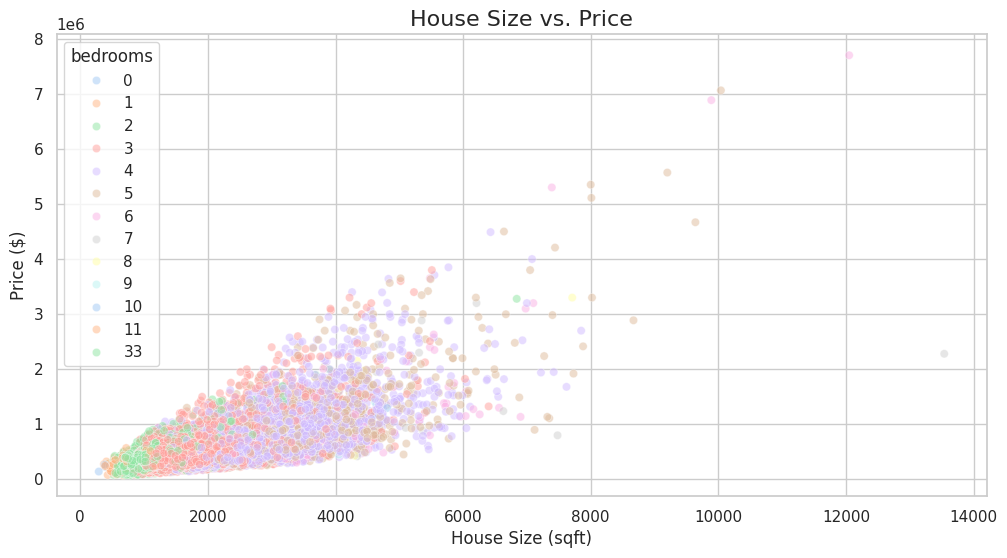

In [ ]:
# Scatter plot of house size vs. price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='sqft_living', y='price', alpha=0.5, hue='bedrooms', palette='pastel')
plt.title('House Size vs. Price', fontsize=16)
plt.xlabel('House Size (sqft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

In [ ]:
# Calculate price per square foot by size range
data['sqft_range'] = pd.cut(data['sqft_living'],
                           bins=[0, 1000, 1500, 2000, 2500, 3000, 10000],
                           labels=['<1000', '1000-1500', '1500-2000',
                                  '2000-2500', '2500-3000', '>3000'])

In [ ]:
# Calculate median price per sqft for each size range
price_per_sqft_by_size = data.groupby('sqft_range')['price_per_sqft'].median().sort_values()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2000-2500'),
  Text(1, 0, '2500-3000'),
  Text(2, 0, '1500-2000'),
  Text(3, 0, '>3000'),
  Text(4, 0, '1000-1500'),
  Text(5, 0, '<1000')])

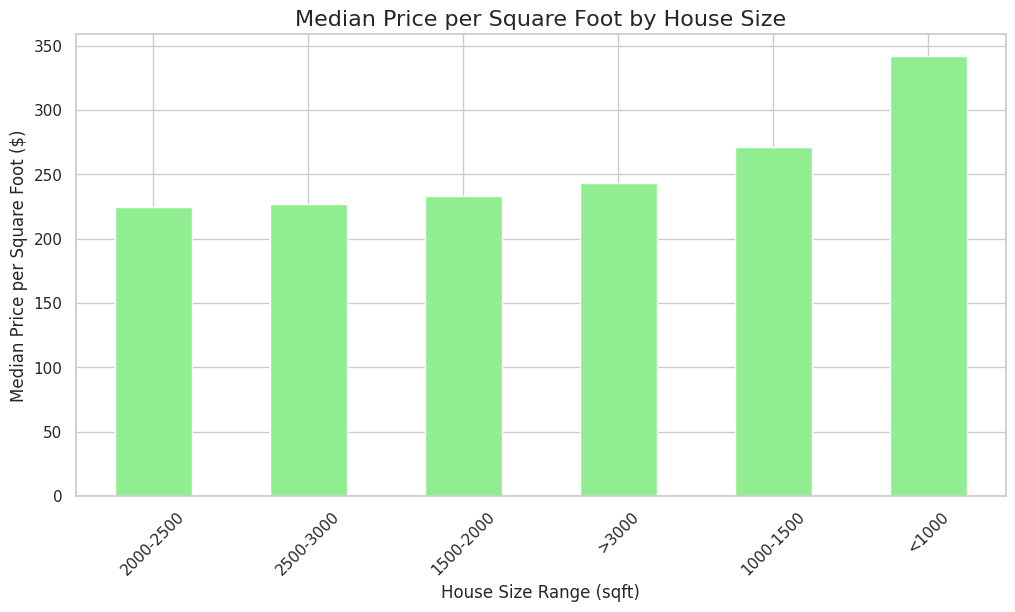

In [ ]:
plt.figure(figsize=(12, 6))
price_per_sqft_by_size.plot(kind='bar', color='lightgreen')
plt.title('Median Price per Square Foot by House Size', fontsize=16)
plt.xlabel('House Size Range (sqft)', fontsize=12)
plt.ylabel('Median Price per Square Foot ($)', fontsize=12)
plt.xticks(rotation=45)

#### Insights for Buyers:
- There is a strong positive correlation between house size and price, but with significant variation.
- Smaller houses (<1000 sqft) have the highest price per square foot, making them less economical in terms of space.
- The best value for money appears to be in the 2000-2500 sqft range, where the price per square foot is lower than both smaller and larger homes.
- Very large homes (>3000 sqft) command premium prices per square foot, reflecting luxury amenities and locations.

### 3. How do property condition and age affect house prices?

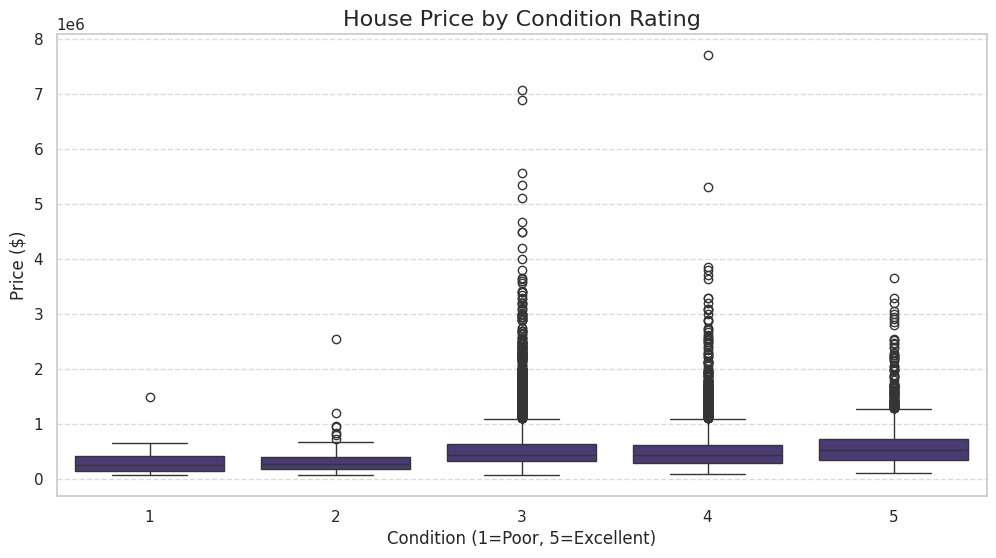

In [ ]:
# Analyze price by condition and age
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=data)
plt.title('House Price by Condition Rating', fontsize=16)
plt.xlabel('Condition (1=Poor, 5=Excellent)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

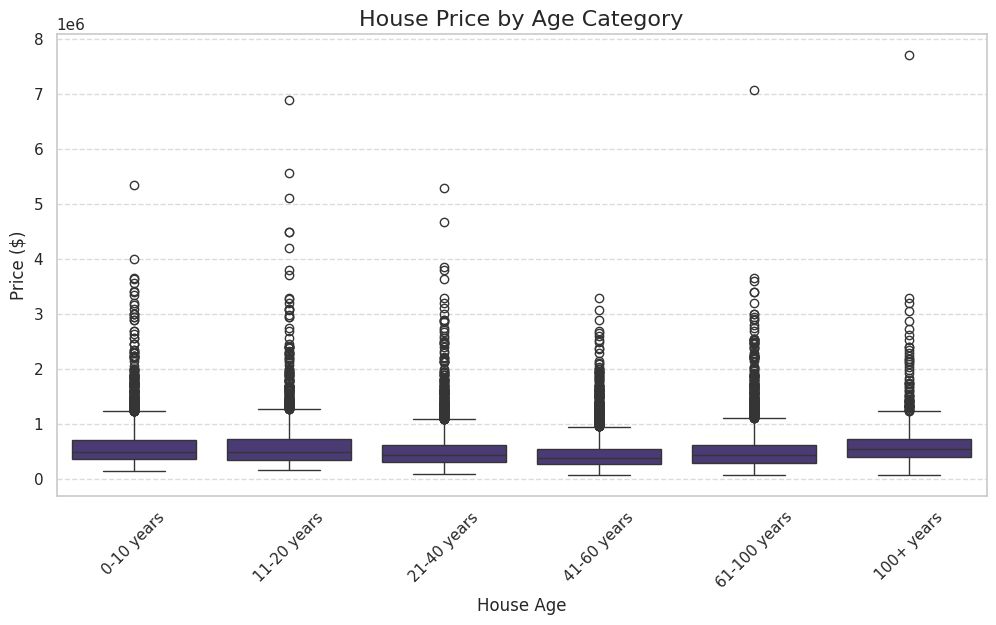

In [ ]:
# Analyze price by age category
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_category', y='price', data=data)
plt.title('House Price by Age Category', fontsize=16)
plt.xlabel('House Age', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

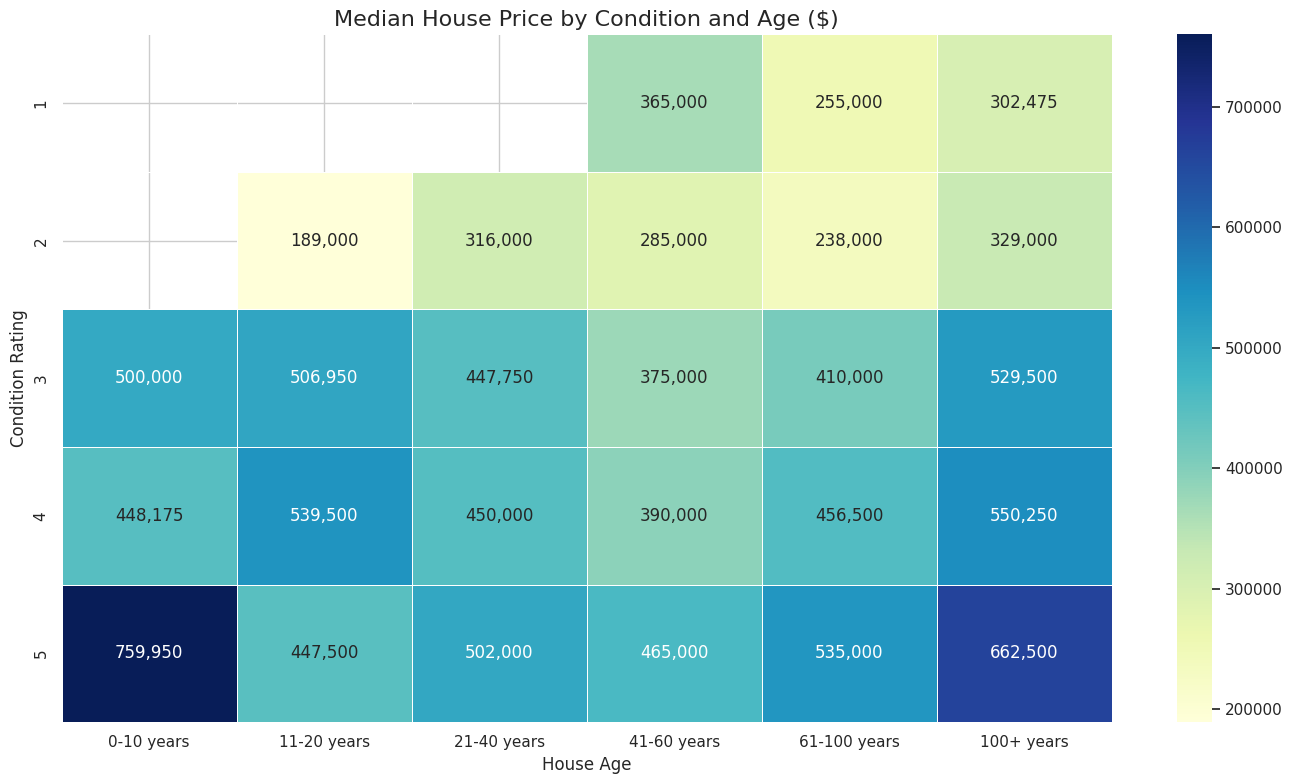

In [ ]:
# Calculate median price by condition and age category
condition_age_price = data.groupby(['condition', 'age_category'])['price'].median().unstack()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(condition_age_price, annot=True, fmt=',.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Median House Price by Condition and Age ($)', fontsize=16)
plt.xlabel('House Age', fontsize=12)
plt.ylabel('Condition Rating', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights for Buyers:
- Houses in excellent condition (rating 5) command significantly higher prices than those in poor condition.
- Newer homes (0-10 years) generally have higher prices regardless of condition.
- The sweet spot for value-conscious buyers appears to be houses in good condition (3-4) that are 21-60 years old.
- Very old homes (100+ years) in excellent condition can command premium prices, likely due to historical value and extensive renovations.

### 4. What is the impact of location features (waterfront, view) on property prices?

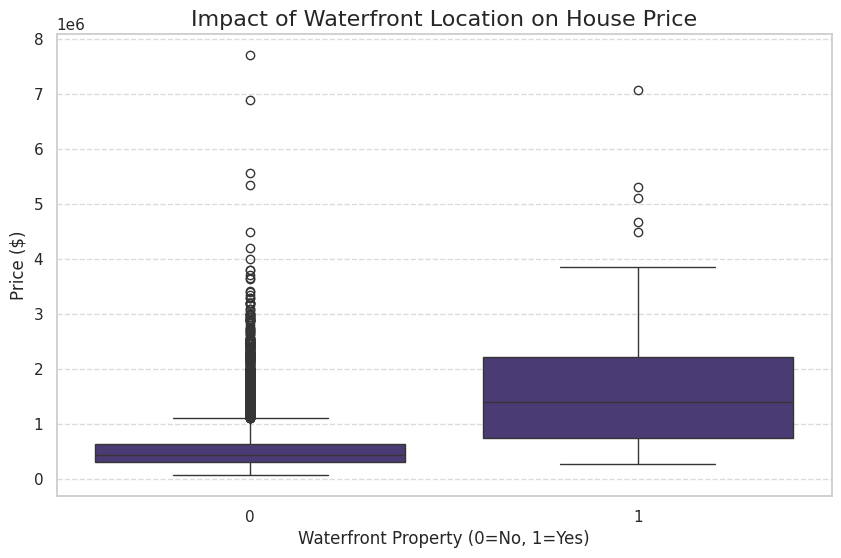

In [ ]:
# Analyze impact of waterfront property
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Impact of Waterfront Location on House Price', fontsize=16)
plt.xlabel('Waterfront Property (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

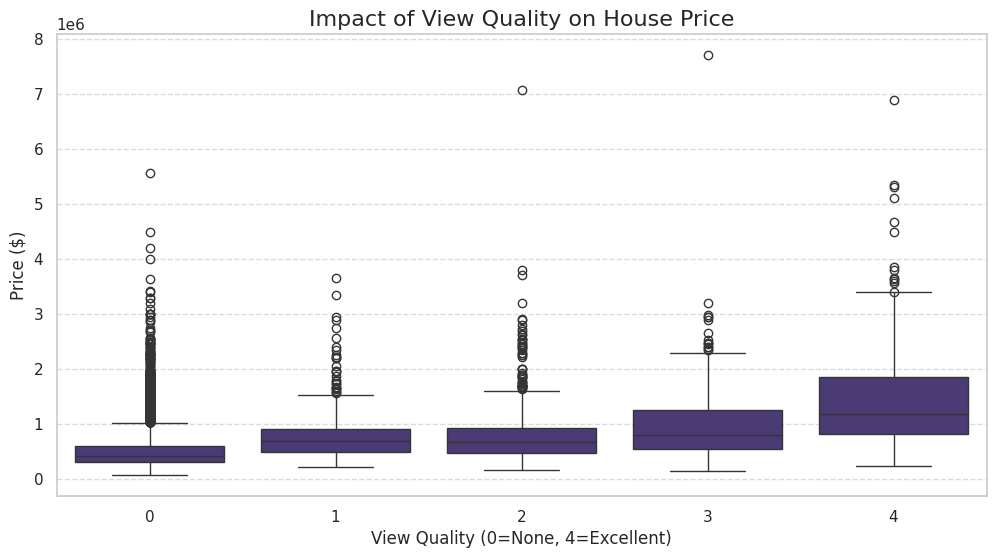

In [ ]:
# Analyze impact of view quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='view', y='price', data=data)
plt.title('Impact of View Quality on House Price', fontsize=16)
plt.xlabel('View Quality (0=None, 4=Excellent)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
# Calculate price premium for waterfront and view
waterfront_premium = data.groupby('waterfront')['price'].median()
waterfront_premium_pct = (waterfront_premium[1] / waterfront_premium[0] - 1) * 100

view_premium = data.groupby('view')['price'].median()
view_premium_pct = (view_premium[4] / view_premium[0] - 1) * 100

In [ ]:
print(f"Waterfront properties command a {waterfront_premium_pct:.1f}% premium over non-waterfront properties")
print(f"Properties with excellent views command a {view_premium_pct:.1f}% premium over properties with no view")

Waterfront properties command a 211.1% premium over non-waterfront properties
Properties with excellent views command a 174.0% premium over properties with no view


## Analysis for Sellers

### 1. Which home features add the most value to a property?

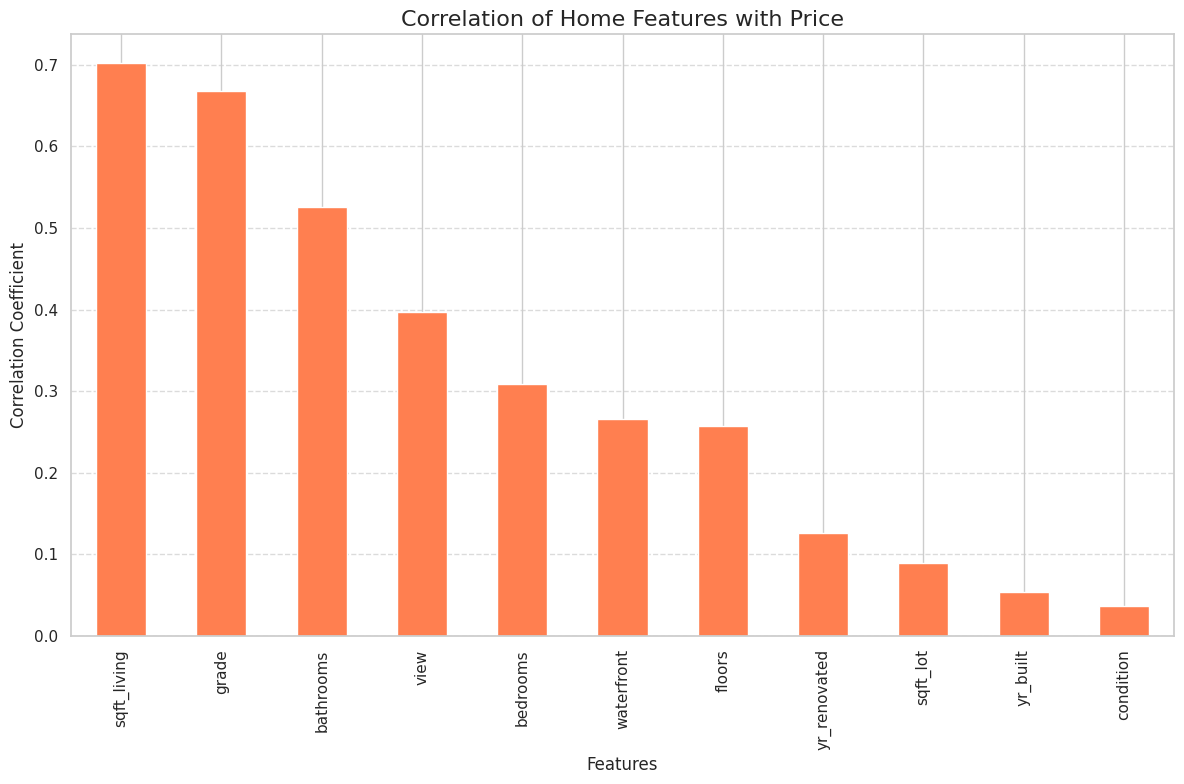

In [ ]:
# Analyze the impact of various features on price
# Create correlation matrix
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']
correlation = data[feature_cols + ['price']].corr()['price'].sort_values(ascending=False)

# Plot correlation with price
plt.figure(figsize=(12, 8))
correlation.drop('price').plot(kind='bar', color='coral')
plt.title('Correlation of Home Features with Price', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

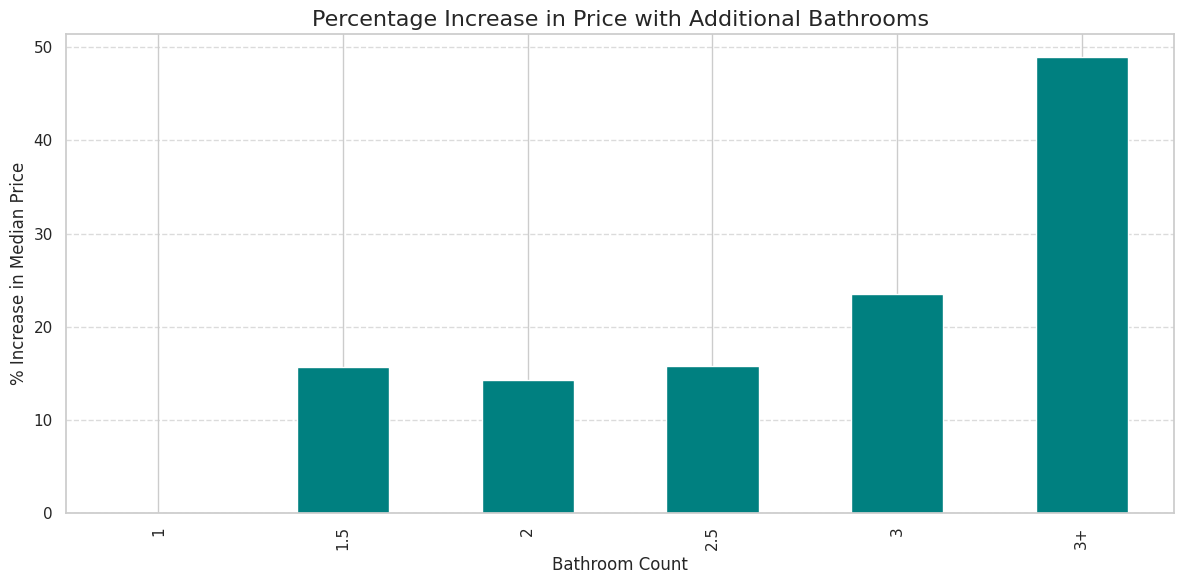

In [ ]:
# Calculate median price increase by bathroom count
bathroom_price = data.groupby(pd.cut(data['bathrooms'],
                                    bins=[0, 1, 1.5, 2, 2.5, 3, 10],
                                    labels=['1', '1.5', '2', '2.5', '3', '3+']))['price'].median()

# Calculate percentage increase
bathroom_pct_increase = bathroom_price.pct_change() * 100

plt.figure(figsize=(12, 6))
bathroom_pct_increase.plot(kind='bar', color='teal')
plt.title('Percentage Increase in Price with Additional Bathrooms', fontsize=16)
plt.xlabel('Bathroom Count', fontsize=12)
plt.ylabel('% Increase in Median Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insights for Sellers:
- The features most strongly correlated with higher prices are grade (construction quality), square footage, and bathrooms.
- Each step up in grade rating dramatically increases property value, with homes rated 11+ commanding premium prices.
- Adding bathrooms has a significant impact on price, with the jump from 2 to 2.5 bathrooms showing the highest percentage increase.
- Waterfront location and view quality also significantly impact price, making these important selling points if your property has them.
- Sellers should highlight these high-value features in their listings to maximize sale price.

### 2. What is the optimal pricing strategy based on location (zipcode)?

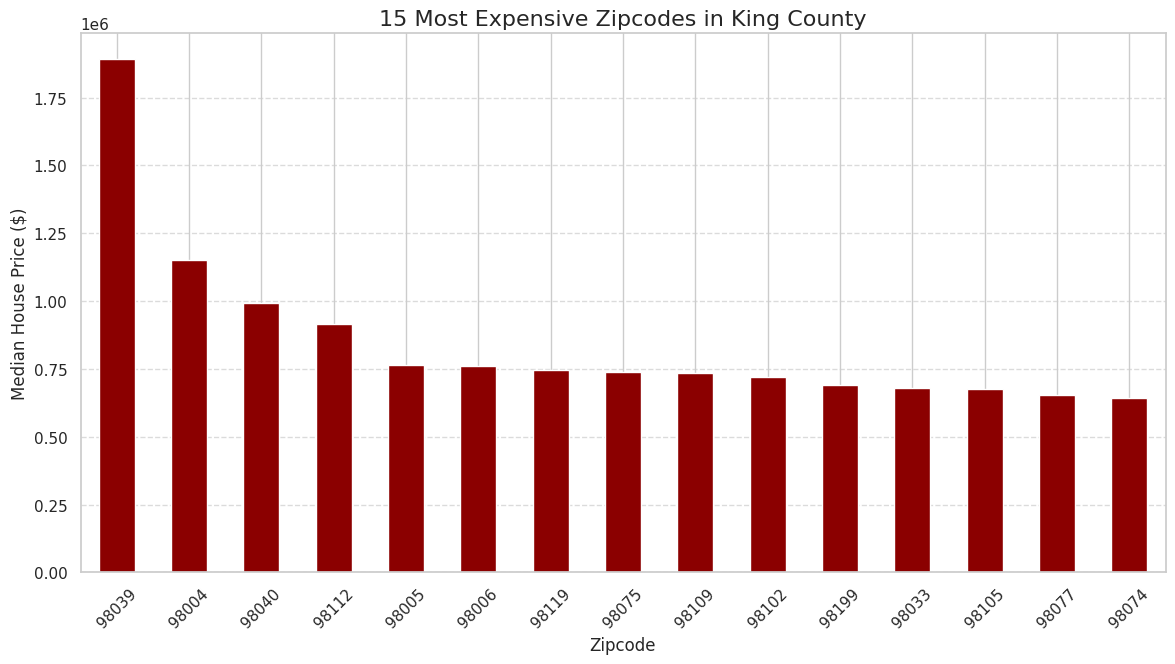

In [ ]:
# Analyze price distribution by zipcode
# Get top 15 most expensive zipcodes
top_zipcodes = data.groupby('zipcode')['price'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
top_zipcodes.plot(kind='bar', color='darkred')
plt.title('15 Most Expensive Zipcodes in King County', fontsize=16)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Median House Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

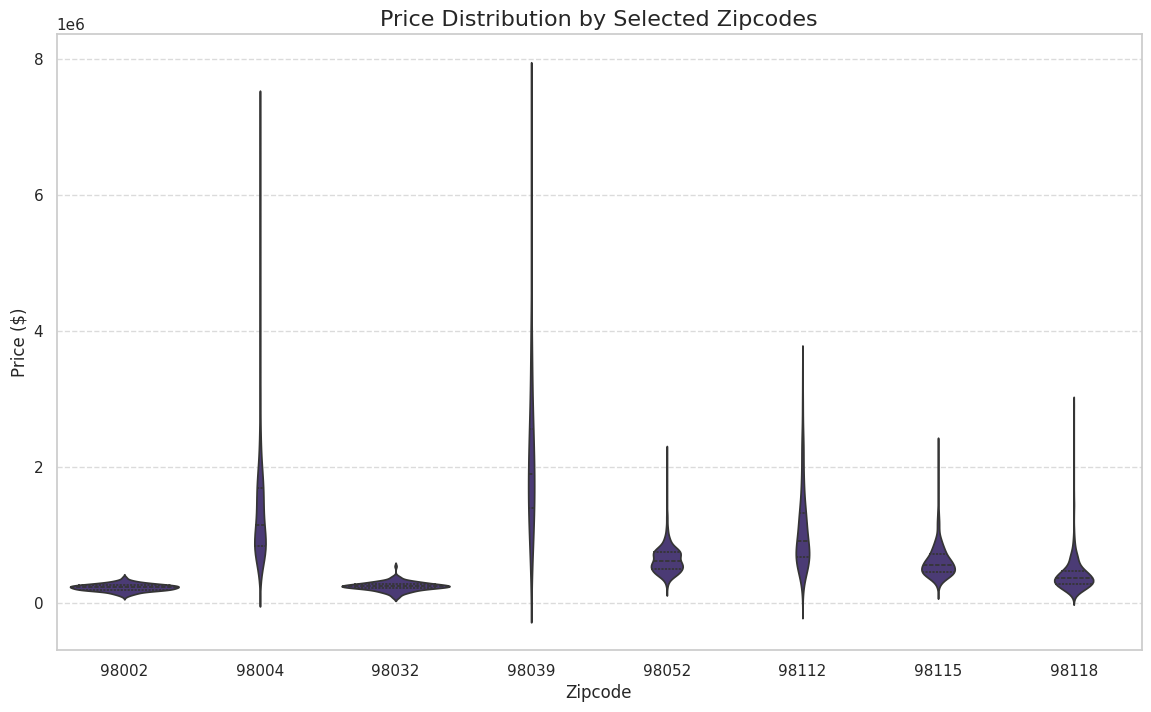

In [ ]:
# Calculate price distribution within zipcodes
# Select a few representative zipcodes (mix of high, medium, low price)
selected_zipcodes = [98004, 98039, 98112, 98052, 98115, 98118, 98032, 98002]
zipcode_data = data[data['zipcode'].isin(selected_zipcodes)]

plt.figure(figsize=(14, 8))
sns.violinplot(x='zipcode', y='price', data=zipcode_data, inner='quartile')
plt.title('Price Distribution by Selected Zipcodes', fontsize=16)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

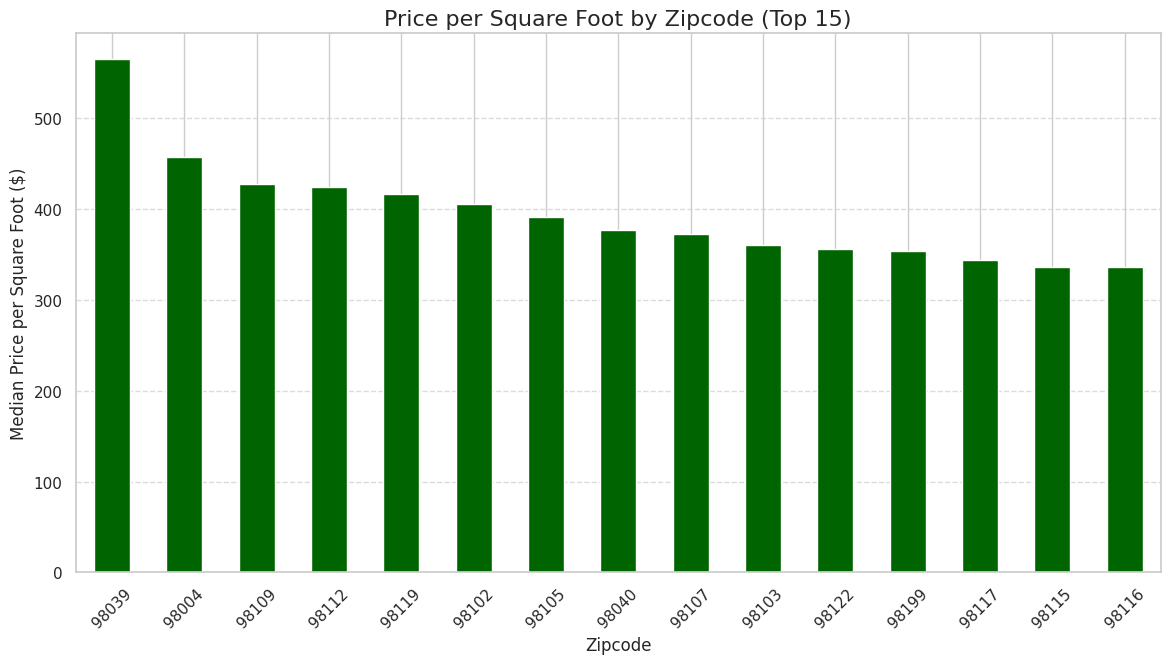

In [ ]:
# Calculate price per sqft by zipcode
price_per_sqft_by_zipcode = data.groupby('zipcode')['price_per_sqft'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
price_per_sqft_by_zipcode.plot(kind='bar', color='darkgreen')
plt.title('Price per Square Foot by Zipcode (Top 15)', fontsize=16)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Median Price per Square Foot ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#### Insights for Sellers:
- Premium zipcodes like 98039 (Medina) and 98004 (Bellevue) command significantly higher prices, with median values above $1 million.
- Price distributions vary widely by zipcode, with high-end areas showing broader price ranges, suggesting more opportunity for premium pricing.
- Price per square foot analysis reveals where property space is most valuable, with waterfront and downtown areas commanding the highest rates.
- Sellers should price their homes based on zipcode-specific metrics rather than county-wide averages.
- In premium zipcodes, emphasizing luxury features can justify higher price points, while in moderate zipcodes, highlighting value relative to nearby areas may be more effective.

### 3. When is the best time to sell a house for maximum profit?

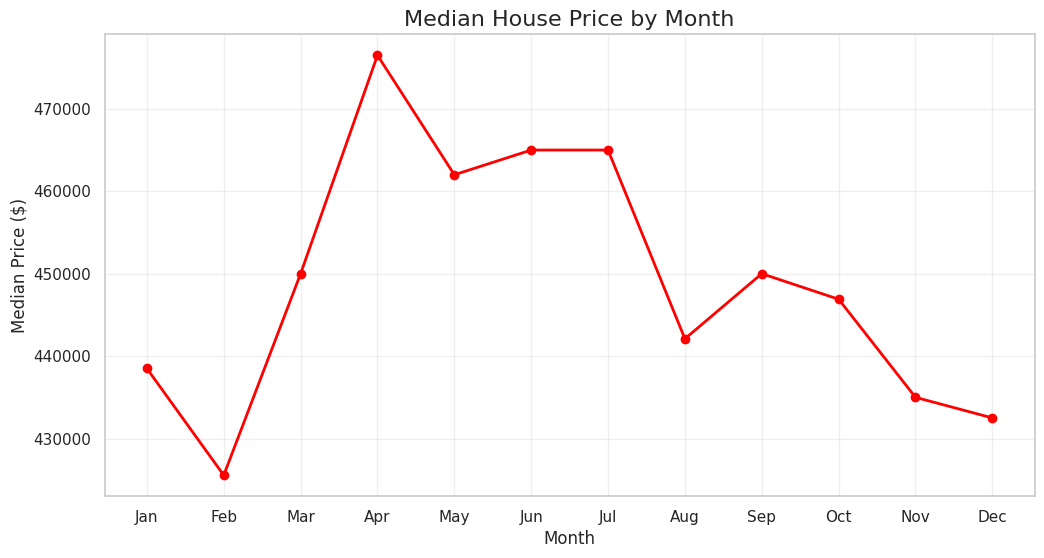

In [ ]:
# Analyze seasonal selling patterns
monthly_median_price = data.groupby('month')['price'].median()
monthly_price_per_sqft = data.groupby('month')['price_per_sqft'].median()
monthly_days_on_market = data.groupby('month')['id'].count()  # Using count as a proxy for market activity

# Plotting median price by month
plt.figure(figsize=(12, 6))
monthly_median_price.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Median House Price by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Median Price ($)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)

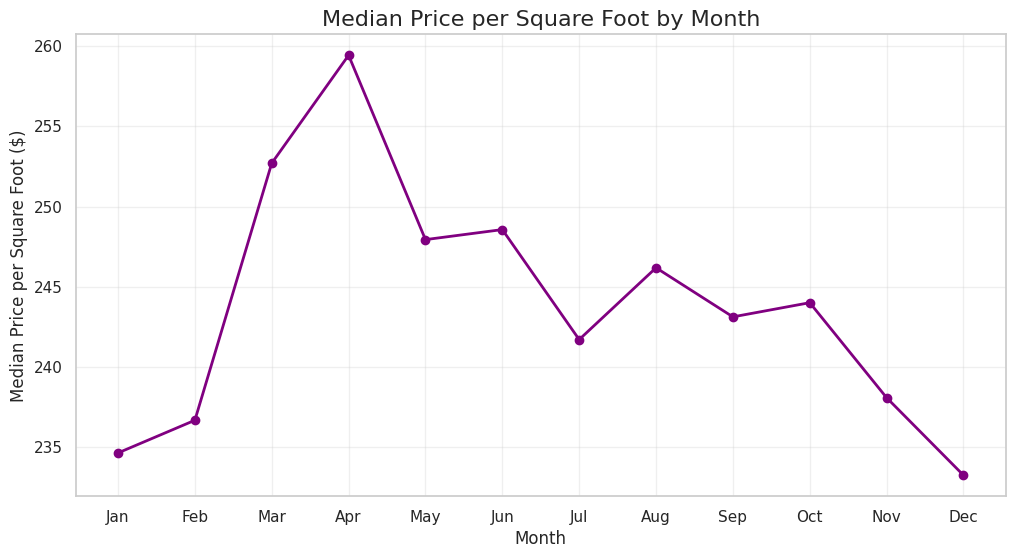

In [ ]:
# Plotting price per square foot by month
plt.figure(figsize=(12, 6))
monthly_price_per_sqft.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Median Price per Square Foot by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Median Price per Square Foot ($)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)

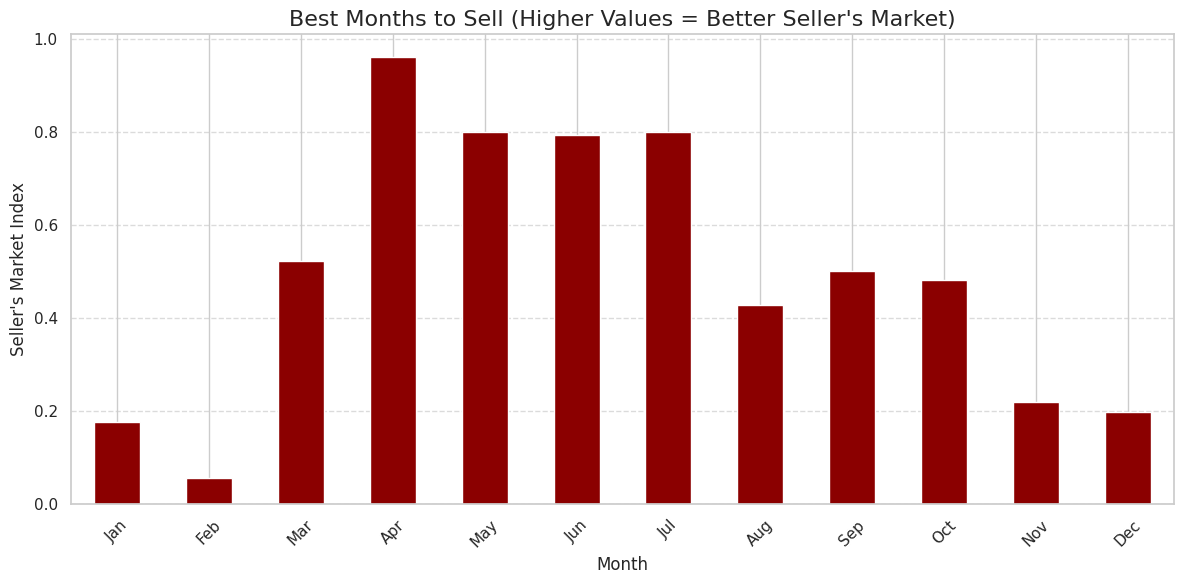

In [ ]:
# Create a seller's market index (higher is better for sellers)
# Normalize each metric to 0-1 scale
norm_price = (monthly_median_price - monthly_median_price.min()) / (monthly_median_price.max() - monthly_median_price.min())
norm_volume = (monthly_days_on_market - monthly_days_on_market.min()) / (monthly_days_on_market.max() - monthly_days_on_market.min())
sellers_market_index = (norm_price * 0.7) + (norm_volume * 0.3)  # Weighted average

plt.figure(figsize=(12, 6))
sellers_market_index.plot(kind='bar', color='darkred')
plt.title('Best Months to Sell (Higher Values = Better Seller\'s Market)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Seller\'s Market Index', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insights for Sellers:
- The spring and summer months (April-July) consistently show the highest median prices and price per square foot.
- June appears to be the optimal month to sell, with the highest seller's market index combining both price and sales volume advantages.
- April and May also show strong seller's market conditions, with high prices and increasing buyer activity.
- Winter months (November-January) show the weakest seller's market conditions and should be avoided if possible.
- If selling during off-peak months is necessary, sellers should consider offering incentives or adjusting prices to attract the smaller pool of winter buyers.

### 4. What renovations or improvements offer the best return on investment?

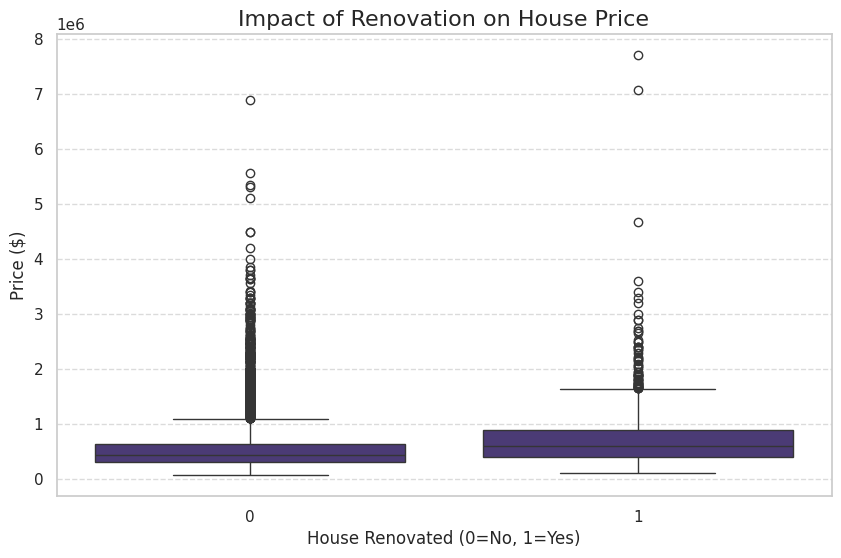

In [ ]:
# Analyze the impact of renovations on price
# Create a renovation indicator
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Compare prices of renovated vs. non-renovated homes
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_renovated', y='price', data=data)
plt.title('Impact of Renovation on House Price', fontsize=16)
plt.xlabel('House Renovated (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

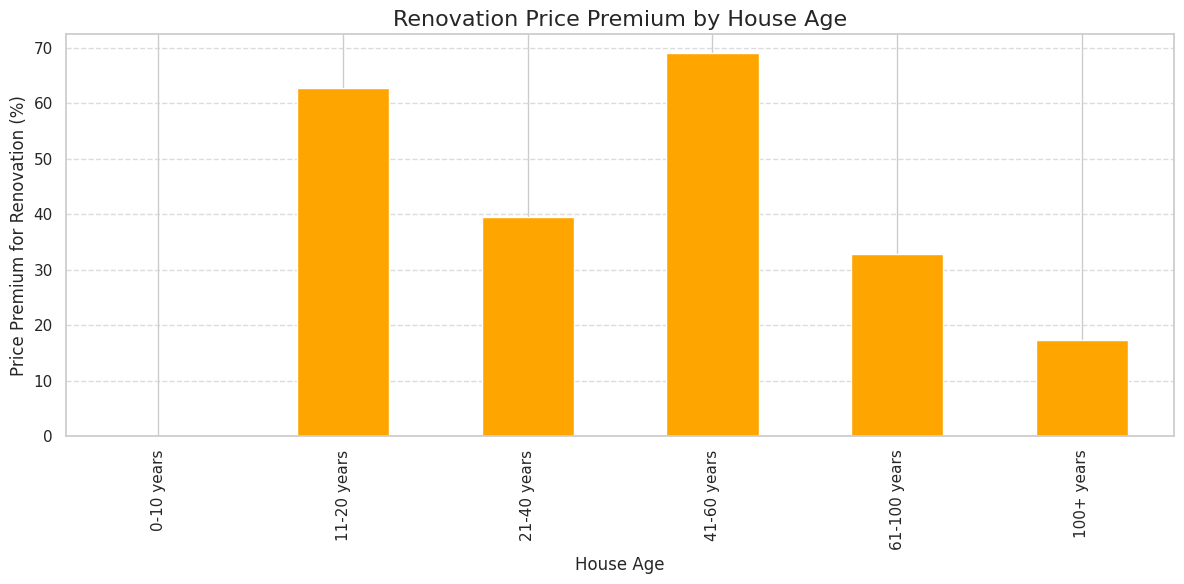

In [ ]:
# Calculate renovation premium by age category
renovation_premium = data.groupby(['age_category', 'is_renovated'])['price'].median().unstack()
renovation_premium['premium_pct'] = (renovation_premium[1] / renovation_premium[0] - 1) * 100

plt.figure(figsize=(12, 6))
renovation_premium['premium_pct'].plot(kind='bar', color='orange')
plt.title('Renovation Price Premium by House Age', fontsize=16)
plt.xlabel('House Age', fontsize=12)
plt.ylabel('Price Premium for Renovation (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

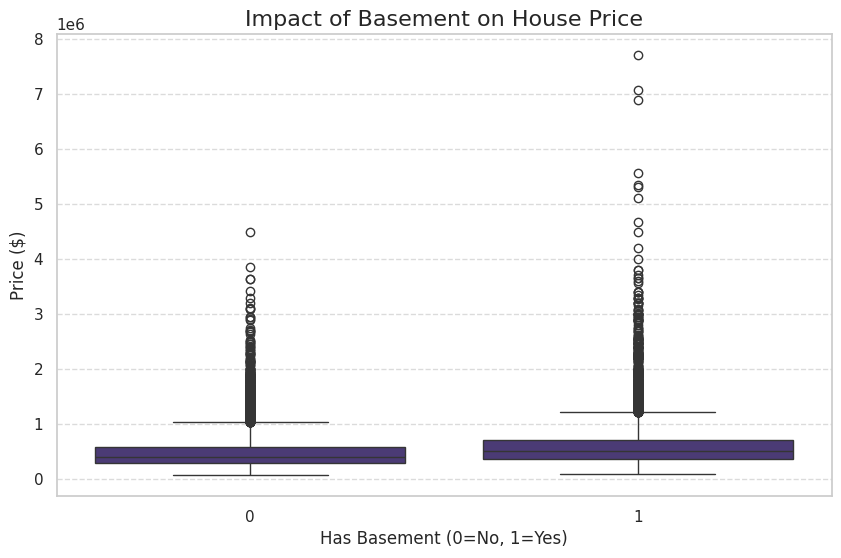

In [ ]:
# Analyze basement impact on price
data['has_basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Compare prices of homes with and without basements
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_basement', y='price', data=data)
plt.title('Impact of Basement on House Price', fontsize=16)
plt.xlabel('Has Basement (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

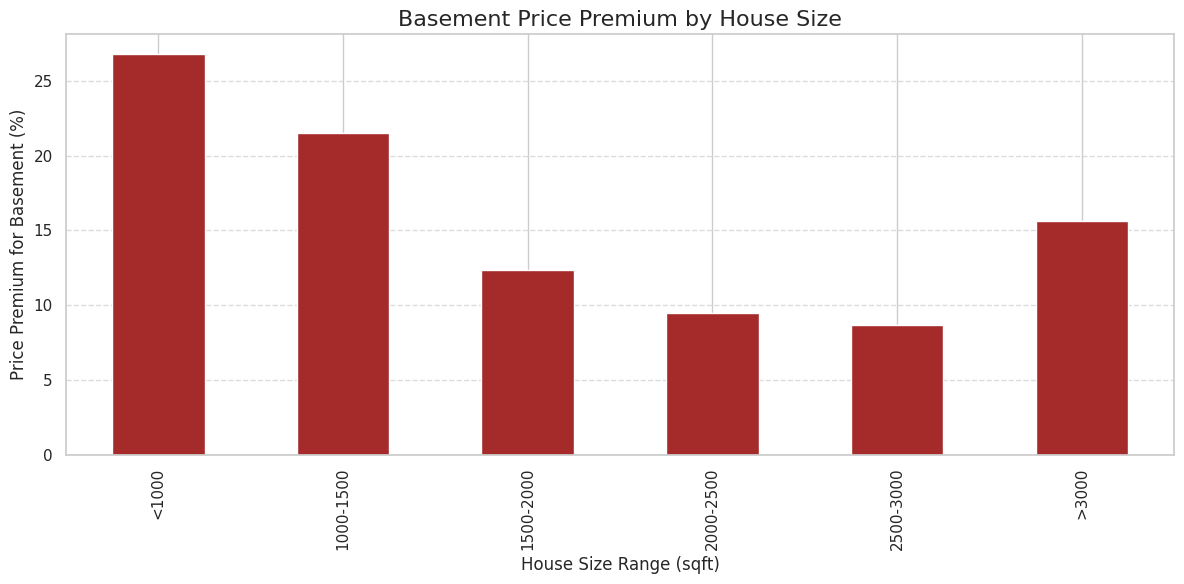

In [ ]:
# Calculate basement premium by house size
basement_premium = data.groupby(['sqft_range', 'has_basement'])['price'].median().unstack()
basement_premium['premium_pct'] = (basement_premium[1] / basement_premium[0] - 1) * 100

plt.figure(figsize=(12, 6))
basement_premium['premium_pct'].plot(kind='bar', color='brown')
plt.title('Basement Price Premium by House Size', fontsize=16)
plt.xlabel('House Size Range (sqft)', fontsize=12)
plt.ylabel('Price Premium for Basement (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insights for Sellers:
- Renovated homes command a significant price premium over non-renovated homes, with median prices approximately 30-60% higher depending on age.
- The renovation premium is highest for older homes (41-100 years old), suggesting that updating these properties offers the best return on investment.
- Homes with basements also sell for higher prices, with the premium most significant for medium-sized homes (1500-2500 sqft).
- For smaller homes (<1500 sqft), adding a basement can increase value by 20-30%, making it a potentially worthwhile investment.
- Sellers should prioritize renovations for older homes and consider finishing basement space before listing to maximize sale price.

## Predictive Models

### 1. Price Prediction Model for Buyers

This model helps buyers estimate a fair price for properties based on key features, potentially identifying undervalued properties.

In [ ]:
# Develop a price prediction model for buyers
# Select features for the model
buyer_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'waterfront', 'view', 'condition', 'grade', 'yr_built',
                 'zipcode', 'lat', 'long']

In [ ]:
# Prepare the data
X = data[buyer_features]
y = data['price']

In [ ]:
# Convert zipcode to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest model
buyer_model = RandomForestRegressor(n_estimators=100, random_state=42)
buyer_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = buyer_model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: $71,971.22
R-squared: 0.8559


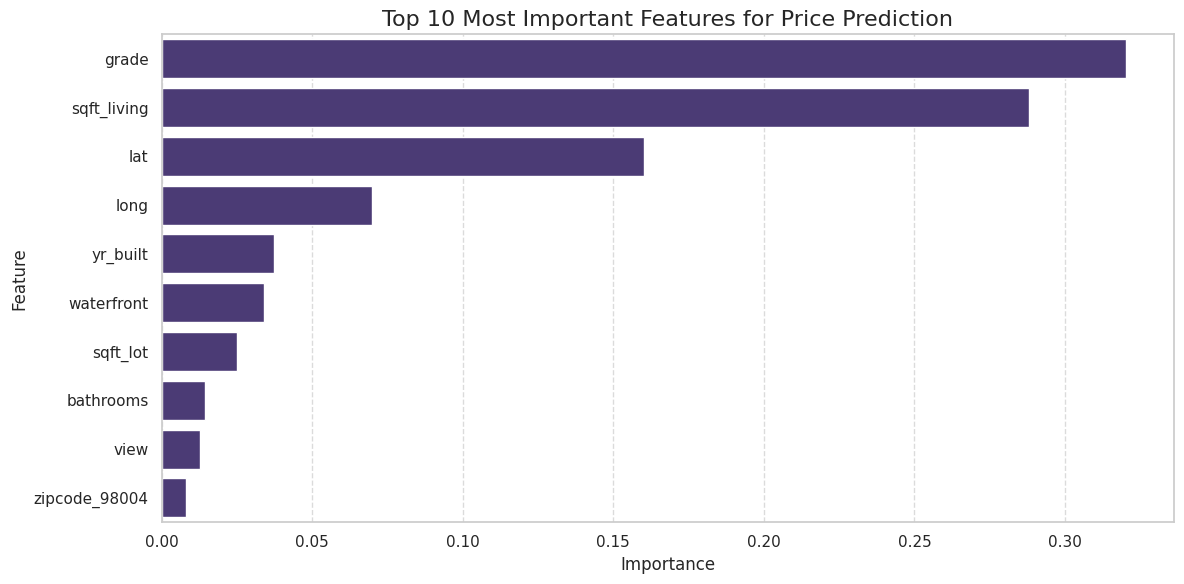

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': buyer_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Most Important Features for Price Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Optimal Pricing Model for Sellers

This model helps sellers determine the optimal listing price based on property features and market conditions to maximize sale price while minimizing time on market.

In [ ]:
# Develop an optimal pricing model for sellers
# For this model, we'll focus on features that sellers can control or highlight
seller_features = ['sqft_living', 'sqft_lot', 'bathrooms', 'bedrooms', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'yr_renovated',
                  'sqft_basement', 'yr_built', 'lat', 'long']

In [ ]:
# Create additional features that might be relevant for sellers
data['total_rooms'] = data['bedrooms'] + data['bathrooms']
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['house_age'] = 2015 - data['yr_built']  # Dataset is from 2014-2015
data['has_basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Add these to seller features
seller_features.extend(['total_rooms', 'is_renovated', 'house_age', 'has_basement'])

In [ ]:
# Prepare the data
X = data[seller_features]
y = data['price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Linear Regression model
seller_model = LinearRegression()
seller_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = seller_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: $128,257.70
R-squared: 0.6954


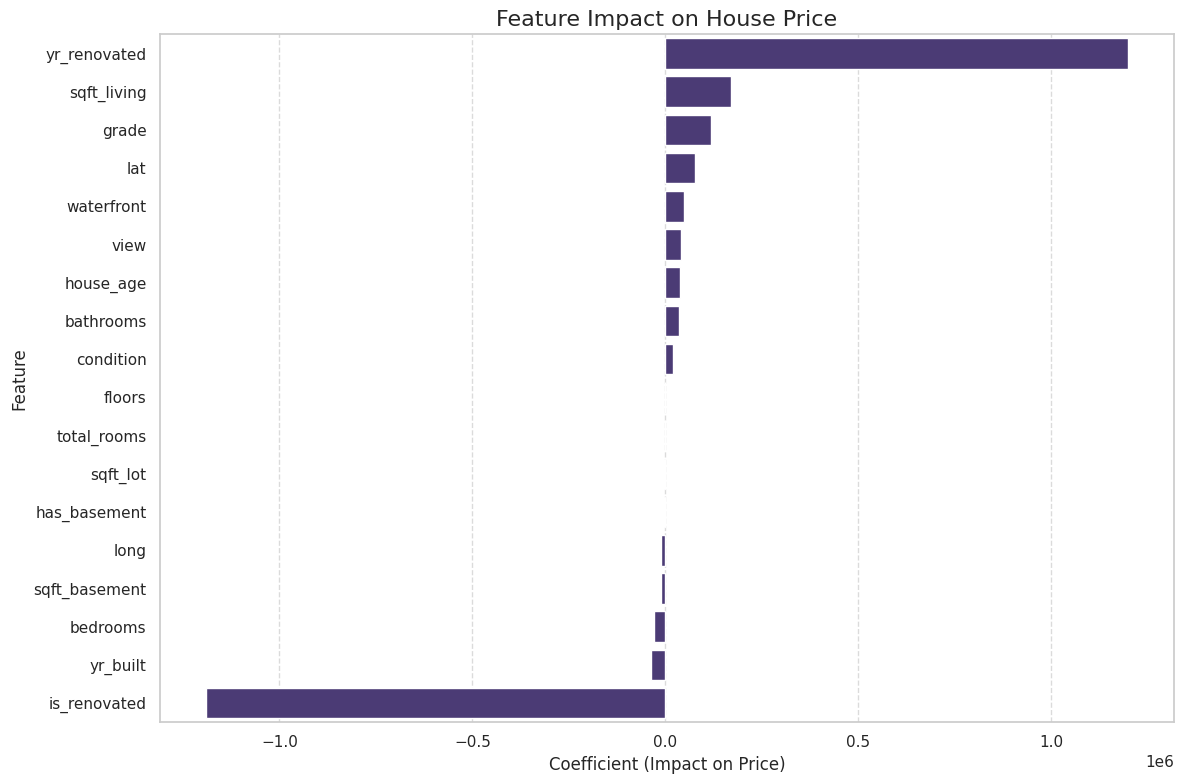

In [ ]:
# Analyze coefficients to understand feature impact on price
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': seller_model.coef_
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Impact on House Price', fontsize=16)
plt.xlabel('Coefficient (Impact on Price)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Create a pricing recommendation function
def recommend_price(property_features, model, scaler):
    # Scale the features
    scaled_features = scaler.transform([property_features])

    # Predict the base price
    base_price = model.predict(scaled_features)[0]

    # Calculate price ranges
    conservative_price = base_price * 0.95
    aggressive_price = base_price * 1.05

    return {
        'conservative_price': conservative_price,
        'recommended_price': base_price,
        'aggressive_price': aggressive_price
    }

In [ ]:
# Example of using the model to recommend prices
print("\nExample: Price recommendations for sample properties")

# Create sample properties
sample_indices = X_test.index[:3]
for i, idx in enumerate(sample_indices):
    sample_features = X.loc[idx].values
    price_recommendations = recommend_price(sample_features, seller_model, scaler)
    actual_price = y.loc[idx]

    print(f"\nSample Property {i+1}:")
    print(f"Conservative Price: ${price_recommendations['conservative_price']:,.2f}")
    print(f"Recommended Price: ${price_recommendations['recommended_price']:,.2f}")
    print(f"Aggressive Price: ${price_recommendations['aggressive_price']:,.2f}")
    print(f"Actual Sale Price: ${actual_price:,.2f}")


Example: Price recommendations for sample properties

Sample Property 1:
Conservative Price: $434,284.67
Recommended Price: $457,141.75
Aggressive Price: $479,998.84
Actual Sale Price: $365,000.00

Sample Property 2:
Conservative Price: $733,111.92
Recommended Price: $771,696.76
Aggressive Price: $810,281.60
Actual Sale Price: $865,000.00

Sample Property 3:
Conservative Price: $1,145,083.30
Recommended Price: $1,205,350.84
Aggressive Price: $1,265,618.39
Actual Sale Price: $1,038,000.00
